In [39]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [43]:
df=pd.read_csv('/content/AAPL.csv')

In [44]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100453,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095213,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088224,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090408,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093029,73449600


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10216 entries, 0 to 10215
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10216 non-null  object 
 1   Open       10216 non-null  float64
 2   High       10216 non-null  float64
 3   Low        10216 non-null  float64
 4   Close      10216 non-null  float64
 5   Adj Close  10216 non-null  float64
 6   Volume     10216 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 558.8+ KB


In [46]:
df1 = df.reset_index()['Low']

In [47]:
df1

0          0.128348
1          0.121652
2          0.112723
3          0.115513
4          0.118862
            ...    
10211    127.070000
10212    129.389999
10213    128.460007
10214    129.649994
10215    130.240005
Name: Low, Length: 10216, dtype: float64

In [48]:
type(df1)

pandas.core.series.Series

In [49]:
np.where(pd.isnull(df1))

(array([], dtype=int64),)

In [50]:
df1 = df1.dropna()

In [51]:
np.where(pd.isnull(df1))

(array([], dtype=int64),)

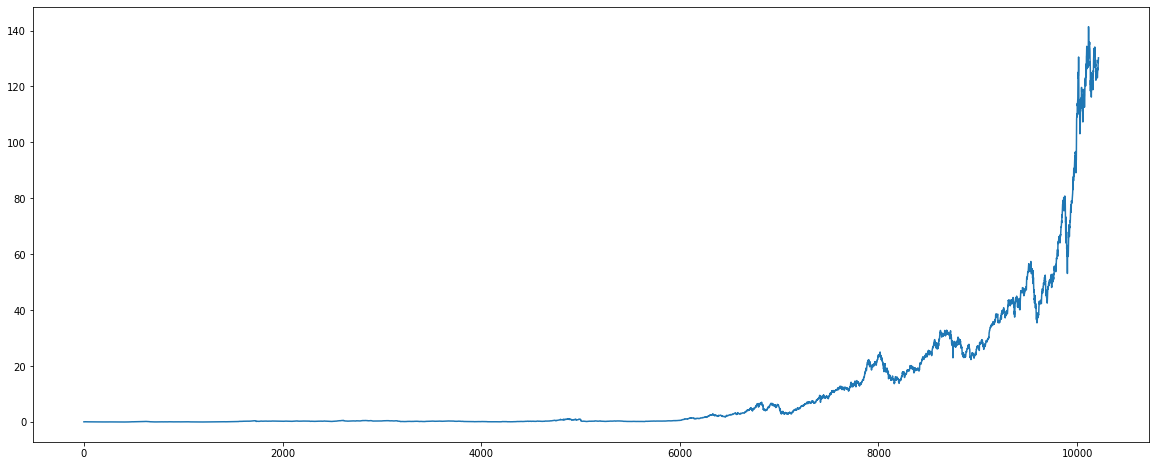

In [52]:
plt.figure(figsize=(20,8))
plt.plot(df1)

In [53]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [54]:
df1

array([[5.60716828e-04],
       [5.13335297e-04],
       [4.50152846e-04],
       ...,
       [9.08647701e-01],
       [9.17068162e-01],
       [9.21243136e-01]])

In [55]:
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [56]:
training_size, test_size

(8172, 2044)

In [57]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0] 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [58]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [59]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [60]:
model=Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mean_squared_error'])

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_2 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_3 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trai

In [62]:
model.fit(X_train,y_train,epochs=100, batch_size=64, shuffle=False)

Epoch 1/100
127/127 [==============================] - 29s 190ms/step - loss: 1.1636e-04 - mean_squared_error: 1.1636e-04
Epoch 2/100
127/127 [==============================] - 24s 188ms/step - loss: 4.5971e-04 - mean_squared_error: 4.5971e-04
Epoch 3/100
127/127 [==============================] - 24s 190ms/step - loss: 3.8690e-04 - mean_squared_error: 3.8690e-04
Epoch 4/100
127/127 [==============================] - 24s 191ms/step - loss: 3.0908e-04 - mean_squared_error: 3.0908e-04
Epoch 5/100
127/127 [==============================] - 24s 191ms/step - loss: 3.4245e-04 - mean_squared_error: 3.4245e-04
Epoch 6/100
127/127 [==============================] - 24s 191ms/step - loss: 4.9374e-04 - mean_squared_error: 4.9374e-04
Epoch 7/100
127/127 [==============================] - 24s 191ms/step - loss: 5.5572e-04 - mean_squared_error: 5.5572e-04
Epoch 8/100
127/127 [==============================] - 24s 190ms/step - loss: 9.2420e-04 - mean_squared_error: 9.2420e-04
Epoch 9/100
127/127 [===

In [63]:
test_predict=model.predict(X_test)

In [64]:
print(f'MSE {mean_squared_error(y_test, test_predict)}')
print(f'R2 {r2_score(y_test, test_predict)}')

MSE 0.14014362380335962
R2 -1.9219392509088609


In [65]:
test_predict=scaler.inverse_transform(test_predict)
train_predict=model.predict(X_train)
train_predict=scaler.inverse_transform(train_predict)

In [66]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

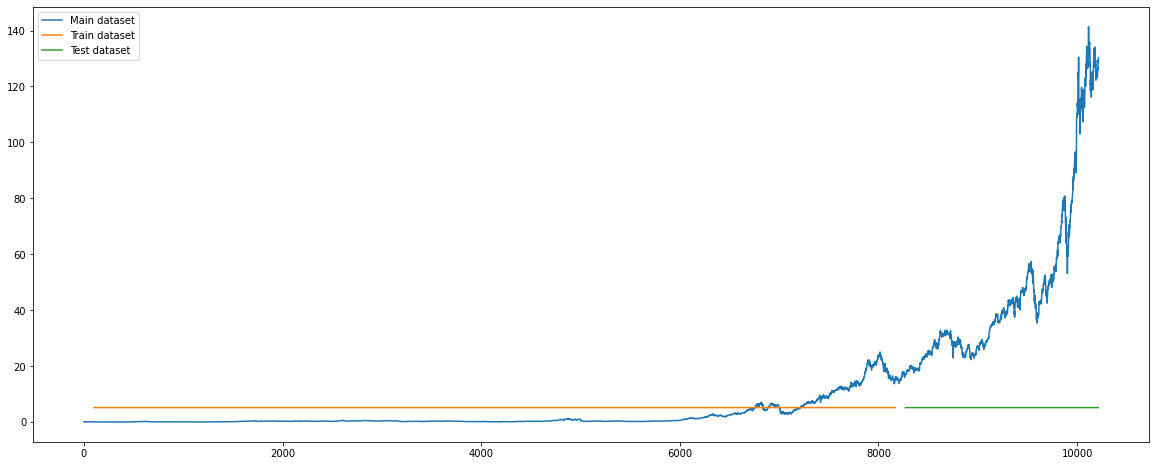

In [67]:
plt.figure(figsize=(20,8))
plt.plot(scaler.inverse_transform(df1),label='Main dataset')
plt.plot(trainPredictPlot,label='Train dataset')
plt.plot(testPredictPlot,label='Test dataset')
plt.legend()

In [68]:
x_input=df1[len(df1)-100:].reshape(1,-1)

In [69]:
x_input = x_input.reshape((1, 100,1))
y_predict = model.predict(x_input, verbose=0)
next_day_value = scaler.inverse_transform(y_predict)

In [70]:
next_day_value

array([[5.2165647]], dtype=float32)

Next day - low price - 124.88(USD)